In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv(
 'Datasets/Play Tennis.csv')
df.head()

,Day,Outlook,Temperature,Humidity,Wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [4]:
def entropy(target_col):
 elements, counts = np.unique(target_col, return_counts=True)
 entropy = np.sum([(-counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
 return entropy

In [5]:
def InfoGain(data, split_attribute_name, target_name="play"):
 total_entropy = entropy(data[target_name])
 vals, counts = np.unique(data[split_attribute_name], return_counts=True)
 Weighted_Entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data.where(data[split_attribute_name] == vals[i]).dropna()[target_name])
    for i in range(len(vals))])
 Information_Gain = total_entropy - Weighted_Entropy
 return Information_Gain

In [7]:
def ID3(data, originaldata, features, target_attribute_name="play", parent_node_class=None):
 if len(np.unique(data[target_attribute_name])) <= 1:
    return np.unique(data[target_attribute_name])[0]
 elif len(data) == 0:
    return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name], return_counts=True)[1])]
 elif len(features) == 0:
    return parent_node_class
 else:
    parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])] 
    item_values = [InfoGain(data, feature, target_attribute_name) for feature in features]
 best_feature_index = np.argmax(item_values)
 best_feature = features[best_feature_index]
 tree = {best_feature: {}}
 features = [i for i in features if i !=best_feature]
 for value in np.unique(data[best_feature]):
    value = value
    sub_data = data.where(data[best_feature] == value).dropna()
 subtree = ID3(sub_data, data, features, target_attribute_name, parent_node_class)
 tree[best_feature][value] = subtree
 return tree 

In [8]:
def gini(x):
 elements, counts = np.unique(x, return_counts=True)
 gini = np.sum([(-counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
 return gini

In [10]:
def giniIndex(data, target_name="play"):
 total_gini = gini(data[target_name])
 vals, counts = np.unique(data[target_name], return_counts=True)
 Weighted_gini = np.sum([(counts[i] / np.sum(counts)) *
gini(data.where(data[target_name] == vals[i]).dropna()[target_name])
for i in range(len(vals))])
 Information_gini = total_gini - Weighted_gini
 return Information_gini

0.24674981977443933
0.02922256565895487
0.15183550136234159
0.04812703040826949
0.9402859586706311
       play
0  0.940286


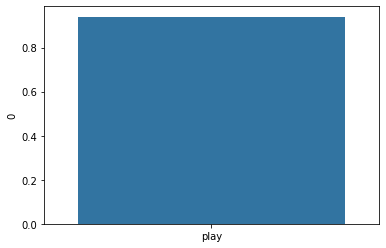


{'Day': {'D9': 'Yes'}}


In [17]:
def main():
 data = df
 originaldata = df
 features = np.array(data.columns)[:-1]
 tree = ID3(data, originaldata, features)
 #info gain
 print(InfoGain(data, 'Outlook', 'play'))
 print(InfoGain(data, 'Temperature', 'play'))
 print(InfoGain(data, 'Humidity', 'play'))
 print(InfoGain(data, 'Wind', 'play'))
 #entropy
 print(entropy(data['play']))
 #print gini as a table
 table = pd.DataFrame(columns=['play'])
 table.loc[0] = [giniIndex(data, 'play')]
 print(table)
 #print gini as a graph
 sns.barplot(x=table.columns, y=table.loc[0])
 plt.show()
 #print tree
 print()
 print(tree)
main()